## Power Analysis

### SWABT:

* Describe the concept of "Power" in relation to p-value and effect size for hypothesis testing. 
* Understand and critically evaluate the factors influencing the power of an experiment.
* Perform Power calculation using Scipy and Python.
* Demonstrate the impact of sample size on statistical power using simulations.
* Demonstrate the combined effect of sample size and effect size on statistical power using simulations.


### Overview


Power analysis is an important aspect of experimental design. It allows us to determine the sample size required to detect an effect of a given size with a given degree of confidence. Conversely, it allows us to determine the probability of detecting an effect of a given size with a given level of confidence, under sample size constraints. If the probability is unacceptably low, we would be wise to alter or abandon the experiment.

The following four quantities have an intimate relationship:

* Sample size
* Effect size
* Significance level = P (Type I error) = probability of finding an effect that is not there
* **Power = 1 - P (Type II error)** = probability of finding an effect that is there

Given any three, we can determine the fourth.

In this lesson, we will consider a general-purpose simulation approach to estimating the power of an experimental design.

Consider a scenario with an expected effect size and sample size and we would like to know the associated power. For our example experiment, we will use a design with two factors: 

1. 30 participants per group
2. A ‘large’ effect size (Cohen’s d = 0.8). 

Here, we will determine the power of this test.



In [1]:
import numpy as np
import scipy.stats as stats
import pandas
import matplotlib.pyplot as plt

# No. of groups
groups = 2

# No. of samples
n = 30

# No. of simulations
sims = 10000

# Effect size = 0.8, same standard deviation for both groups
# Use two lists to store mean and sigma values
means = [0.0, 0.8] 
sigmas = [1.0, 1.0]

# Initialize a numpy array with size equal to sims and fill with nans. Store the p value for each simulation later
p_val = np.empty(sims)
p_val.fill(np.nan)

### Calculating Power

We shall now perform a large number of simulated experiments, each time calculating our test statistic (independent samples t-test, in this case) and counting the number of times we reject the null hypothesis. The power is simply the proportion of times that we are able to reject the null hypothesis (remembering that we control the population means and we know that there is a true difference).

In [17]:
#  Run a for loop for range of values in sims
for sim in range(sims):

    # Create a numpy array "data" with size (no. of samples x no. of groups) and fill with Nans
    data = np.empty([n,groups])
    data.fill(np.nan)
    
    # Simulate the data for experiment for 2 groups using a for loop 
    for group in range(groups):

        # Generate normal distribution for both groups described above and save in the data array under different index
        data[:, group] = np.random.normal(loc=means[group], scale=sigmas[group], size=n)
    
    # Run an independant t-test on generated distributions stored in numpy array 
    result = stats.ttest_ind(data[:,0],data[:,1])
    
    # Store the p value with simulation number 
    p_val[sim] = result[1]

# number of simulations where the null was rejected
rejects = np.sum(p_val<0.05)
reject_proportion = rejects/float(sims)

# Print the reject proportion as power
print('Power: ',reject_proportion)
# Power:  0.855

Power:  0.8572


We can see that our power to detect a large effect size with 30 participants per group in a between-subjects design is about 86%. That is, if a large effect size is truly present then we would expect to be able to reject the null hypothesis (at an alpha of 0.05) about 86% of the time.

### Calculate sample size to achieve a *given power* for a *given effect size*

Consider a scenario where you have a design and effect size in mind and would like to know what sample size you would need to achieve a particular power e.g. 80%. This is a straightforward extension of the previous example: we begin with a sample size and calculate the associated power. We then perform such a calculation repeatedly, each time increasing the sample size, until the power has reached the desired level.

The simulation code shown above can be slightly modified to improve speed of execution (i.e. the computational cost, which must be considered at all times while running large tests). Let’s make some tweaks to allow the simulations to be performed quicker. 

In the code below, we generate the simulated data all at once and then use the axis argument to `scipy.stats.ttest_ind` to perform the test. 

In [60]:
def simulation(power, cohen_d):
    
    # initialize with 20 samples per group 
    n = 20
    
    # Identify the effect size between groups
    means = [0.0, cohen_d]
    sigmas = [1.0, 1.0]

    # No. of groups
    groups = len(means)

    # Set 10000 simulations
    sims = 10000

    # power level that we would like to reach
    power_target = power

    # initialise the power for the current sample size to a small value
    power_current = 0.0
    pow_samp = []
    
    # keep iterating until desired power is obtained
    while power_current < power_target:
        
        # create a numpy array with dimensions [sims, n, groups] and fill with nans
        data = np.empty([sims,n,groups])
        data.fill(np.nan)
        
        # generate random samples for both groups and run t tests
        for group in range(groups):
            data[:, :, group] =  np.random.normal(loc=means[group],scale=sigmas[group],size=[sims,n])

        result = stats.ttest_ind(data[:,:,0],data[:,:,1],axis=1)

        p_val = result[1]

        # Number of simulations where the null hypothesis was rejected
        rejects = np.sum(p_val < 0.05)
        
        # Calculate reject proportion
        reject_proportion = rejects/float(sims)

        power_current =  reject_proportion

        print("With", n,"samples per group, Power =", power_current)
        # append results to pow_samp
        pow_samp.append([n,power_current])
        # increase the number of samples by one for the next iteration of the loop
        n+=1
        
    return pow_samp

Now we can set the value for required power and effect size to calculate the number of samples required to achieve the specified level of power.

With 20 samples per group, Power = 0.6985
With 21 samples per group, Power = 0.7189
With 22 samples per group, Power = 0.7389
With 23 samples per group, Power = 0.7484
With 24 samples per group, Power = 0.7742
With 25 samples per group, Power = 0.7895
With 26 samples per group, Power = 0.8061
With 27 samples per group, Power = 0.8173
With 28 samples per group, Power = 0.8342
With 29 samples per group, Power = 0.8565
With 30 samples per group, Power = 0.8535
With 31 samples per group, Power = 0.8713
With 32 samples per group, Power = 0.8801
With 33 samples per group, Power = 0.8998
With 34 samples per group, Power = 0.9015
With 35 samples per group, Power = 0.9076
With 36 samples per group, Power = 0.9223
With 37 samples per group, Power = 0.9288
With 38 samples per group, Power = 0.9263
With 39 samples per group, Power = 0.9373
With 40 samples per group, Power = 0.944
With 41 samples per group, Power = 0.9456
With 42 samples per group, Power = 0.9538
With 43 samples per group, Power = 

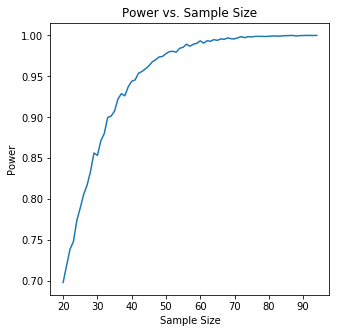

In [63]:
# Set Power and Cohen'd - Change these values and observe the effect on the outcome. 
set_power = 1
set_d = 0.8

#  Plot power vs sample size
plt.figure(figsize=(5,5))
plt.title('Power vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Power')

ans = simulation(set_power,set_d)
df = pandas.DataFrame(ans)
plt.plot(df[0],df[1])
plt.show()


The figure shows a decelerating relationship between the number of samples in each group and the power. 

>**EXERCISE: Calculating power across varying sample and effect sizes**

>In the previous examples, we have assumed a fixed (‘large’) effect size. However, perhaps we want to investigate how power changes with both effect size and sample size. This is again a straightforward extension of the previous example. 

>1. Generate samples with sizes ranging from 10 to 50 per group
2. Set effect size from less than small (i.e. 0.2) to slightly bigger than large (0.8)
3. set number of simulations to 10000
4. Use nested For loop i.e. for all chosen effect sizes,for all chosen sample sizes, for all groups (i.e. 2) - run the 2 sample independent test and store power, chosen sample size and effect size
5. Visualize your data in a meaningful way to communicate results 

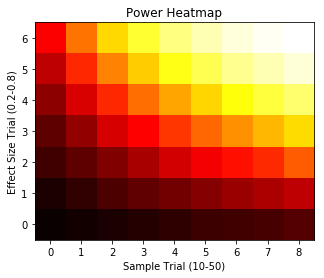

In [88]:
#create sample sizes from 10 to 50 increasing in increments of 5
samples_per_group = np.arange(10,51,5)
#total number of samples to try out
n_samples_per_group = len(samples_per_group)

#create array of effect sizes from 0.2-0.8 incrementing by 0.1
effect_sizes = np.arange(.2,.8,.1)
#total number of effect sizes to test out
n_effect_sizes = len(effect_sizes)

#create empty array with dimensions of n_effect_sizes and n_samples_per_group, later will fill with power
power = np.empty([n_effect_sizes,n_samples_per_group])
power.fill(np.nan)

#number of simulations
sims=10000

#loop through all possible effect sizes
for effect_size in range(n_effect_sizes):
    #set first group mean to equal 0, second to equal given effect size from loop. set std to = 1 for both groups
    group_means=[0,effect_sizes[effect_size]]
    group_sigmas=[1,1]
    #num of groups
    groups = len(group_means)
    
    #loop through all sample sizes for each effect size
    for sample_size in range(n_samples_per_group):
        n_per_group = samples_per_group[sample_size]
        #create empty data 3d array with dimensions sims, samples per group, num groups
        data = np.empty([sims,n_per_group,groups])
        data.fill(np.nan)
        
        #loop through each group and generate randomized normal distribution to add to 3d data array
        for group in range(groups):
            #for each group, set mean = group_means, std = group_sigmas, size = sims*samples per group
            data[:, :, group] =  np.random.normal(loc=group_means[group],scale=group_sigmas[group],size=[sims,n_per_group])
        
        #ttest to generate t-value and p-value
        result= stats.ttest_ind(data[:,:,0],data[:,:,1],axis=1)
        
        #set p-value to result from t-test
        p_val=result[1]
        
        #reject null wheneever p_val<alpha, sum all rejects and divide by # sims to get reject proportion
        rejects = np.sum(p_val<0.05)
        reject_proportion = rejects/float(sims)
        
        # add reject proportion to empty power numpy array for tested effect and sample size
        power[effect_size,sample_size] = reject_proportion

#plot heatmap after all simulations completed
plt.imshow(power, cmap='hot',origin = 'lower')
plt.title('Power Heatmap')
#x-axis represents number of samples in group ([10,15,20,25,30,35,40,45,50])
plt.xlabel('Sample Trial (10-50)')
#y-axis represents effect size used [.2,.3,.4,.5,.6,.7,.8] in sample
plt.ylabel('Effect Size Trial (0.2-0.8)')
plt.show()
#power increases as both effect size and sample size increase

In [87]:
power

array([[0.0693, 0.0858, 0.0917, 0.1075, 0.123 , 0.1253, 0.1415, 0.1513,
        0.1666],
       [0.1024, 0.1263, 0.1497, 0.1758, 0.2122, 0.243 , 0.2643, 0.2894,
        0.3163],
       [0.1412, 0.1746, 0.2312, 0.2884, 0.3289, 0.3821, 0.428 , 0.4645,
        0.4959],
       [0.1901, 0.2666, 0.3435, 0.41  , 0.4739, 0.5386, 0.6008, 0.6555,
        0.6945],
       [0.2427, 0.3583, 0.452 , 0.5451, 0.6337, 0.6839, 0.7509, 0.8049,
        0.8448],
       [0.3139, 0.4653, 0.5776, 0.6736, 0.7531, 0.8203, 0.863 , 0.9024,
        0.936 ],
       [0.3912, 0.564 , 0.6952, 0.787 , 0.8616, 0.9125, 0.9392, 0.9637,
        0.9764]])

we can see that the power for a given combination of effect size and sample size per group is represented by the luminance of the relevant cell. 

### Conclusion: 

In this lesson, we recieved an understanding around the idea of "statistical power" and how sample size, p_value and effect size impact the power of an experiment. We ran a simulation to determine the sample size that would provide a given value of power. In the second simulation, we saw the combined effect of sample size and effect size on the power. We can conclude this lesson with the ideas that a) Statistical power increases as we increase the sample size and b) with a small effect size, we require a large number of samples to achieve required power and vice versa. 